## Weather forecasting using LSTM

In [ ]:
import pandas as pd
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

In [ ]:
df= pd.read_csv('testset.csv')
df.head()

,datetime_utc,_conds,_dewptm,_fog,_hail,_heatindexm,_hum,_precipm,_pressurem,_rain,_snow,_tempm,_thunder,_tornado,_vism,_wdird,_wdire,_wgustm,_windchillm,_wspdm
0,19961101-11:00,Smoke,9.0,0,0,NaN,27.0,NaN,1010.0,0,0,30.0,0,0,5.0,280.0,West,NaN,NaN,7.4
1,19961101-12:00,Smoke,10.0,0,0,NaN,32.0,NaN,-9999.0,0,0,28.0,0,0,NaN,0.0,North,NaN,NaN,NaN
2,19961101-13:00,Smoke,11.0,0,0,NaN,44.0,NaN,-9999.0,0,0,24.0,0,0,NaN,0.0,North,NaN,NaN,NaN
3,19961101-14:00,Smoke,10.0,0,0,NaN,41.0,NaN,1010.0,0,0,24.0,0,0,2.0,0.0,North,NaN,NaN,NaN
4,19961101-16:00,Smoke,11.0,0,0,NaN,47.0,NaN,1011.0,0,0,23.0,0,0,1.2,0.0,North,NaN,NaN,0.0


In [ ]:
data = pd.DataFrame(list(df[' _tempm']), index=df['datetime_utc'], columns=['temp'])

In [ ]:
data

,temp
datetime_utc,
19961101-11:00,30.0
19961101-12:00,28.0
19961101-13:00,24.0
19961101-14:00,24.0
19961101-16:00,23.0
...,...
20041115-00:00,13.0
20041115-03:00,16.0
20041115-06:00,24.0


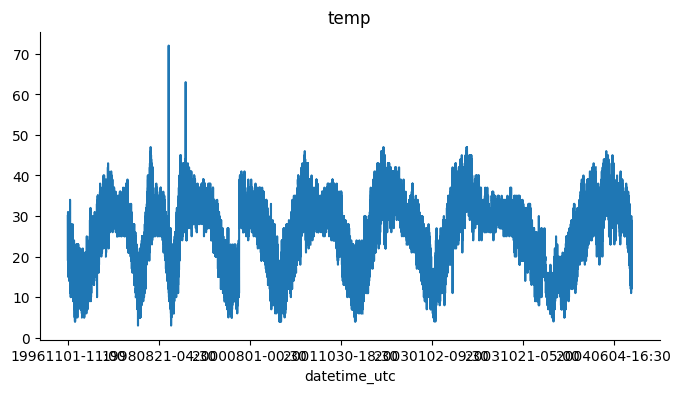

In [ ]:
from matplotlib import pyplot as plt
data['temp'].plot(kind='line', figsize=(8, 4), title='temp')
plt.gca().spines[['top', 'right']].set_visible(False)

We are using only data for 365 days

In [ ]:
df=data[:365]

In [ ]:
df.shape

(365, 1)

In [ ]:
df.isnull().sum()

temp    3
dtype: int64

In [ ]:
df=df.dropna(axis=0)

In [ ]:
df.shape

(362, 1)

In [ ]:
df=df['temp'].values

In [ ]:
df[:5]

array([30., 28., 24., 24., 23.])

In [ ]:
df=df.reshape(-1,1)

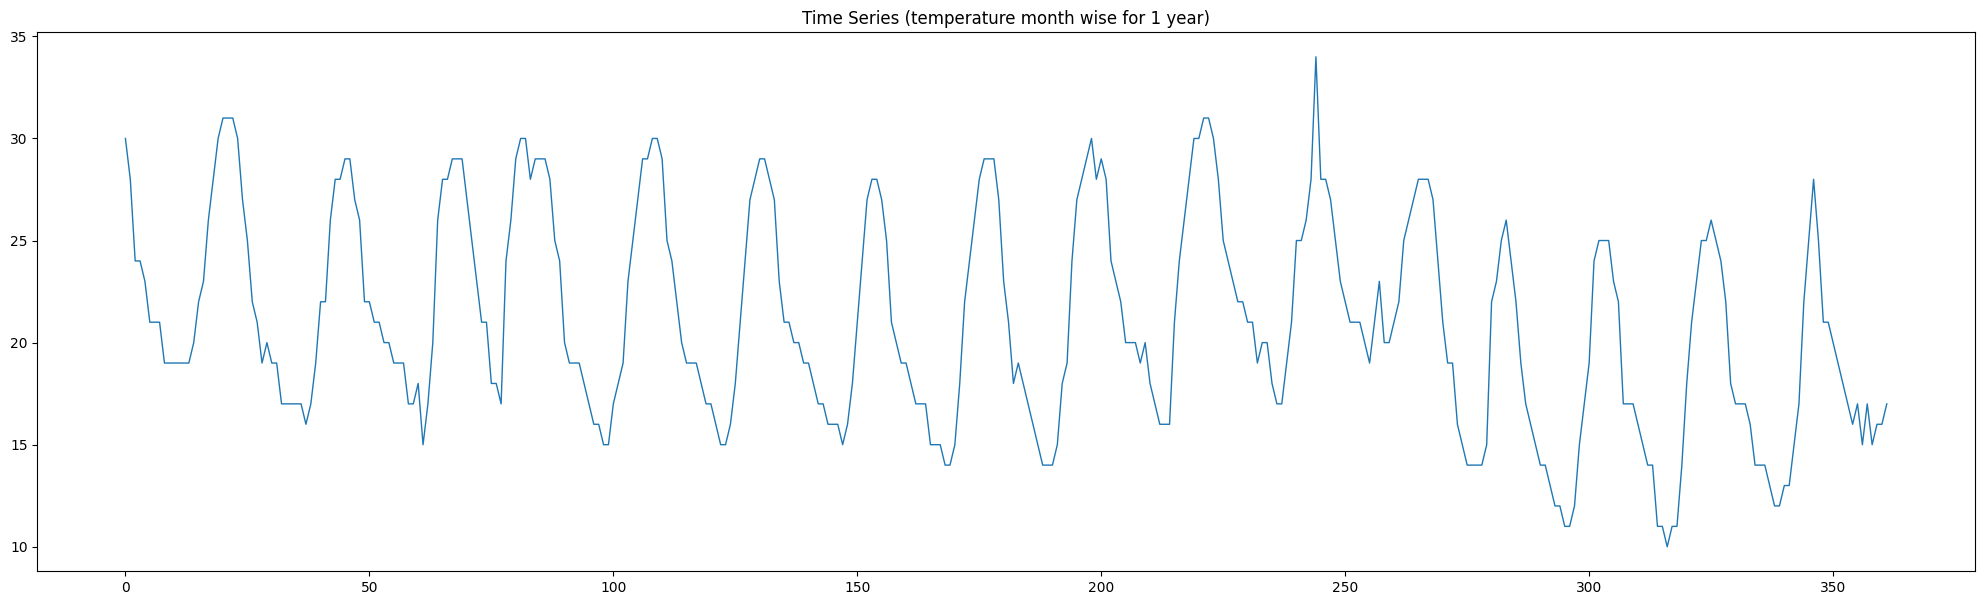

In [ ]:
plt.figure(figsize=(25, 7))
plt.plot(df, linewidth=1)
# plt.grid()
plt.title("Time Series (temperature month wise for 1 year)")
plt.show()

#### Scaling data

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0, 1))
data_scaled = scaler.fit_transform(df)

In [ ]:
data_scaled[:5]

array([[0.83333333],
       [0.75      ],
       [0.58333333],
       [0.58333333],
       [0.54166667]])

In [ ]:
data_scaled.shape

(362, 1)

In [ ]:
steps= 20
inp = []
out = []
for i in range(len(data_scaled) - (steps)):
    inp.append(data_scaled[i:i+steps])
    out.append(data_scaled[i+steps])

In [ ]:
out[:10]

[array([0.875]),
 array([0.875]),
 array([0.875]),
 array([0.83333333]),
 array([0.70833333]),
 array([0.625]),
 array([0.5]),
 array([0.45833333]),
 array([0.375]),
 array([0.41666667])]

reshape

In [ ]:
import numpy as np

In [ ]:
inp= np.asanyarray(inp)
out= np.asanyarray(out)

In [ ]:
len(df)*0.65

235.3

In [ ]:
x_train = inp[:237,:,:]
x_test = inp[237:,:,:]
y_train = out[:237]
y_test= out[237:]

In [ ]:
inp.shape

(342, 20, 1)

In [ ]:
x_train.shape

(237, 20, 1)

In [ ]:
x_test.shape

(105, 20, 1)

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from tensorflow.keras.layers import Dense,RepeatVector, LSTM, Dropout
from tensorflow.keras.layers import Flatten, Conv1D, MaxPooling1D
from tensorflow.keras.layers import Bidirectional, Dropout
from tensorflow.keras.models import Sequential
from tensorflow.keras.utils import plot_model

### Model Building

In [ ]:
model = Sequential()
model.add(LSTM(50, return_sequences= True, input_shape= (20,1)))
model.add(LSTM(50, return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss = 'mean_squared_error', optimizer = 'adam')
model = Sequential()
model.add(LSTM(50, return_sequences= True, input_shape= (20,1)))
model.add(LSTM(50, return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss = 'mean_squared_error', optimizer = 'adam')







In [ ]:
model.fit(x_train,y_train,epochs=300, verbose=1, )

Epoch 1/300
8/8 [==============================] - 7s 50ms/step - loss: 0.1799
Epoch 2/300
8/8 [==============================] - 0s 49ms/step - loss: 0.0735
Epoch 3/300
8/8 [==============================] - 0s 46ms/step - loss: 0.0651
Epoch 4/300
8/8 [==============================] - 0s 28ms/step - loss: 0.0502
Epoch 5/300
8/8 [==============================] - 0s 35ms/step - loss: 0.0519
Epoch 6/300
8/8 [==============================] - 0s 28ms/step - loss: 0.0484
Epoch 7/300
8/8 [==============================] - 0s 29ms/step - loss: 0.0473
Epoch 8/300
8/8 [==============================] - 0s 30ms/step - loss: 0.0465
Epoch 9/300
8/8 [==============================] - 0s 35ms/step - loss: 0.0454
Epoch 10/300
8/8 [==============================] - 0s 34ms/step - loss: 0.0443
Epoch 11/300
8/8 [==============================] - 0s 29ms/step - loss: 0.0431
Epoch 12/300
8/8 [==============================] - 0s 29ms/step - loss: 0.0422
Epoch 13/300
8/8 [==============================]

In [ ]:
model.evaluate(x_test, y_test)

4/4 [==============================] - 2s 10ms/step - loss: 0.0084


0.008375451900064945

### Predictions and Model evaluation

Predictions on training set

In [ ]:
print("Predicted Value",model.predict(x_train)[4][0])
print("Expected value",y_train[4][0])

8/8 [==============================] - 1s 9ms/step
Predicted Value 0.7320577
Expected value 0.7083333333333334


Predictions on testing set

In [ ]:
predictions=model.predict(x_test)

4/4 [==============================] - 0s 8ms/step


In [ ]:
print("Predicted Value",predictions[2][0])
print("Expected Value",y_test[2][0])

Predicted Value 0.4209371
Expected Value 0.41666666666666663


In [ ]:
predictions.shape

(105, 1)

In [ ]:
y_test.shape

(105, 1)

In [ ]:
pred_df=pd.DataFrame(predictions)

In [ ]:
pred_df['TrueValues']=y_test

In [ ]:
pred_df_new = pred_df.rename(columns={ 0: 'Predictions'})

In [ ]:
pred_df_new

,Predictions,TrueValues
0,0.469926,0.541667
1,0.576654,0.416667
2,0.420937,0.416667
3,0.431149,0.458333
4,0.510291,0.500000
...,...,...
100,0.229518,0.291667
101,0.286219,0.208333
102,0.235423,0.250000
103,0.282312,0.250000


Text(0.5, 1.0, 'Predictions VS True Values on Testing Set')

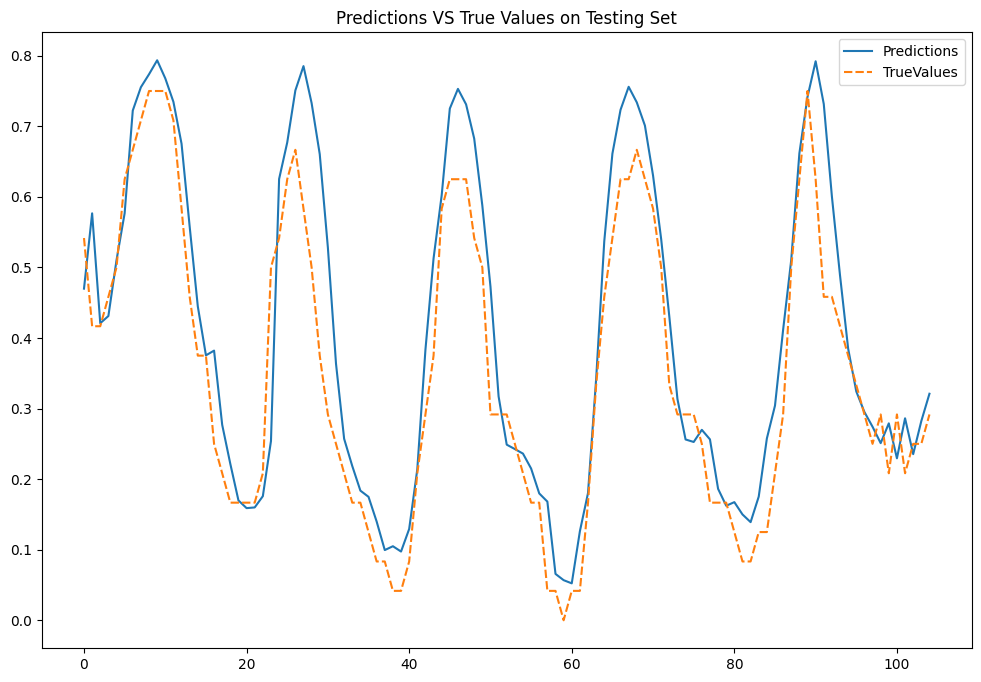

In [ ]:
plt.figure(figsize=(12,8))
sns.lineplot(data= pred_df_new)
plt.title("Predictions VS True Values on Testing Set")

### Weather Predictions for next 30 Days

we are using last 10 days input for 1st day output

In [ ]:
data_scaled.shape

(362, 1)

In [ ]:
x_input=data_scaled[:20]

In [ ]:
x_input.shape

(20, 1)

In [ ]:
# now reshaping the data
x_input = x_input.reshape(1, -1)

In [ ]:
x_input.shape

(1, 20)

In [ ]:
# x_input = x_input.reshape((1, 20,1))
# yhat = model.predict(x_input, verbose=0)

In [ ]:
temp_input = list(x_input)
temp_input = temp_input[0].tolist()

creatitng a  functions which returns the next 30 days prediction

In [ ]:
# demonstrate prediction for next 10 days
from numpy import array

lst_output=[]
n_steps=20
i=0
while(i<30):

    if(len(temp_input)>20):
        #print(temp_input)
        x_input=np.array(temp_input[1:])
        print("{} day input {}".format(i,x_input))
        x_input=x_input.reshape(1,-1)
        x_input = x_input.reshape((1, n_steps, 1))
        #print(x_input)
        yhat = model.predict(x_input, verbose=0)
        print("{} day output {}".format(i,yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input=temp_input[1:]
        #print(temp_input)
        lst_output.extend(yhat.tolist())
        i=i+1
    else:
        x_input = x_input.reshape((1, n_steps,1))
        yhat = model.predict(x_input, verbose=0)
        print(yhat[0])
        temp_input.extend(yhat[0].tolist())
#         print(len(temp_input))
        lst_output.extend(yhat.tolist())
        i=i+1


print(lst_output)

[0.88624823]
1 day input [0.75       0.58333333 0.58333333 0.54166667 0.45833333 0.45833333
 0.45833333 0.375      0.375      0.375      0.375      0.375
 0.375      0.41666667 0.5        0.54166667 0.66666667 0.75
 0.83333333 0.88624823]
1 day output [[0.90368176]]
2 day input [0.58333333 0.58333333 0.54166667 0.45833333 0.45833333 0.45833333
 0.375      0.375      0.375      0.375      0.375      0.375
 0.41666667 0.5        0.54166667 0.66666667 0.75       0.83333333
 0.88624823 0.90368176]
2 day output [[0.8718465]]
3 day input [0.58333333 0.54166667 0.45833333 0.45833333 0.45833333 0.375
 0.375      0.375      0.375      0.375      0.375      0.41666667
 0.5        0.54166667 0.66666667 0.75       0.83333333 0.88624823
 0.90368176 0.8718465 ]
3 day output [[0.7987184]]
4 day input [0.54166667 0.45833333 0.45833333 0.45833333 0.375      0.375
 0.375      0.375      0.375      0.375      0.41666667 0.5
 0.54166667 0.66666667 0.75       0.83333333 0.88624823 0.90368176
 0.8718465  0.

In [ ]:
day_new = np.arange(1,363)
day_pred = np.arange(363,393)

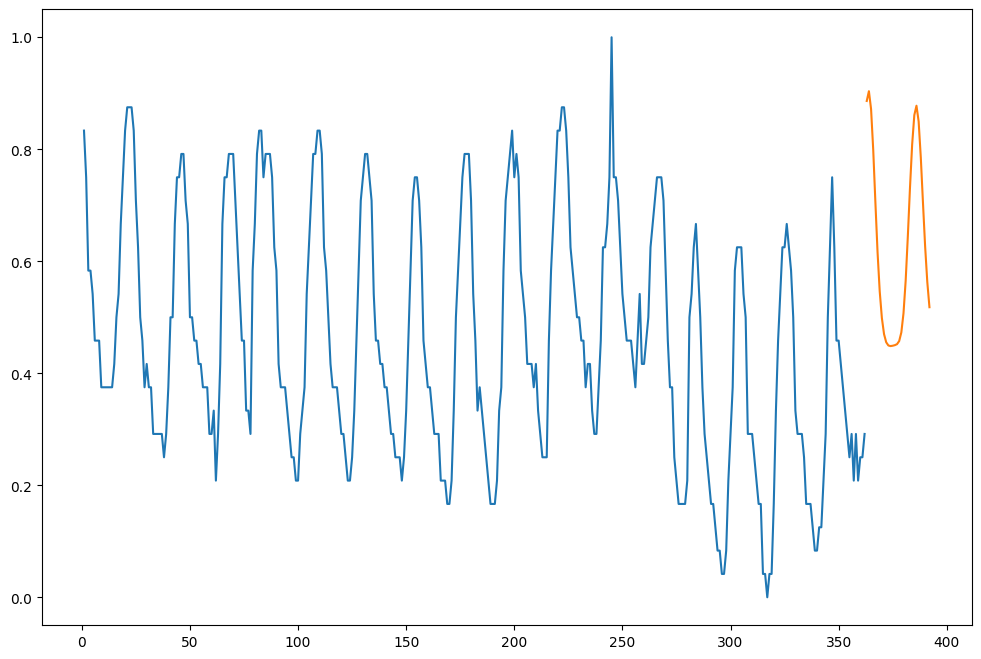

In [ ]:
plt.figure(figsize=(12,8))
plt.plot(day_new,data_scaled)
plt.plot(day_pred,lst_output)

In [ ]:
data_scaled[:5]

array([[0.83333333],
       [0.75      ],
       [0.58333333],
       [0.58333333],
       [0.54166667]])

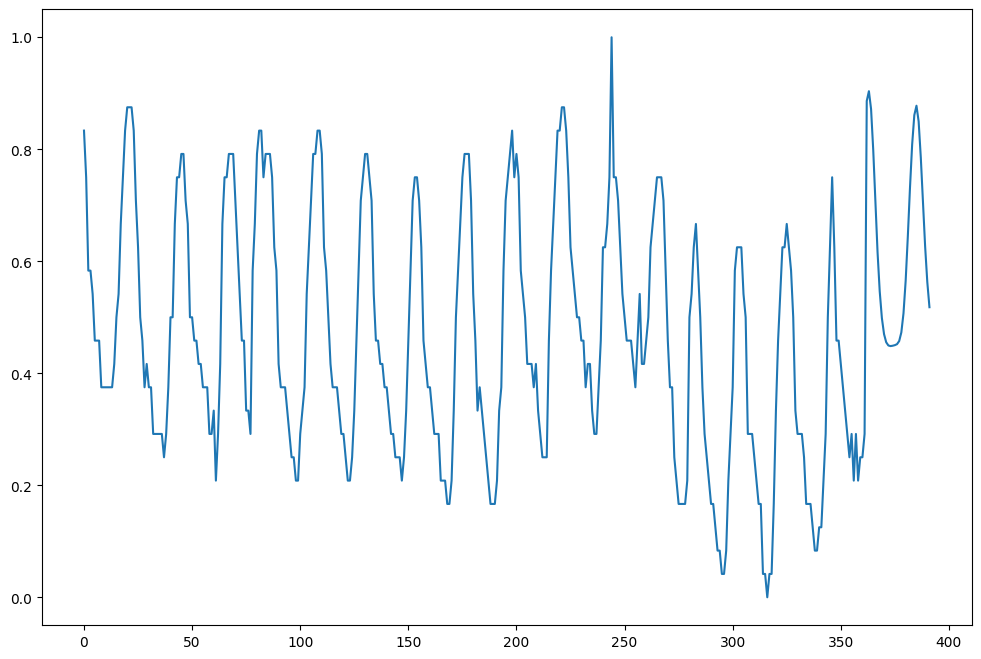

In [ ]:
df3 = data_scaled.tolist()
df3.extend(lst_output)
plt.figure(figsize=(12,8))
plt.plot(df3)


## Thanks You!!!!

In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np

# Predicted values
predictions = model.predict(x_test)

# True values
y_test = y_test

# Calculating MAE
mae = mean_absolute_error(y_test, predictions)
print(f"Mean Absolute Error (MAE): {mae}")

# Calculating MSE
mse = mean_squared_error(y_test, predictions)
print(f"Mean Squared Error (MSE): {mse}")

# Calculating RMSE
rmse = np.sqrt(mse)
print(f"Root Mean Squared Error (RMSE): {rmse}")


4/4 [==============================] - 0s 9ms/step
Mean Absolute Error (MAE): 0.06824725677096655
Mean Squared Error (MSE): 0.008375452983101965
Root Mean Squared Error (RMSE): 0.09151750096621938


In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Define a threshold for classification
threshold = 0.5  # You can adjust this threshold based on your specific needs

# Convert predictions and true values to binary based on the threshold
y_pred_binary = (predictions > threshold).astype(int)
y_test_binary = (y_test > threshold).astype(int)

# Calculating accuracy
accuracy = accuracy_score(y_test_binary, y_pred_binary)
print(f"Accuracy: {accuracy}")

# Calculating precision
precision = precision_score(y_test_binary, y_pred_binary)
print(f"Precision: {precision}")

# Calculating recall
recall = recall_score(y_test_binary, y_pred_binary)
print(f"Recall: {recall}")

# Calculating F1 Score
f1 = f1_score(y_test_binary, y_pred_binary)
print(f"F1 Score: {f1}")

Accuracy: 0.8666666666666667
Precision: 0.6666666666666666
Recall: 0.9629629629629629
F1 Score: 0.7878787878787878
